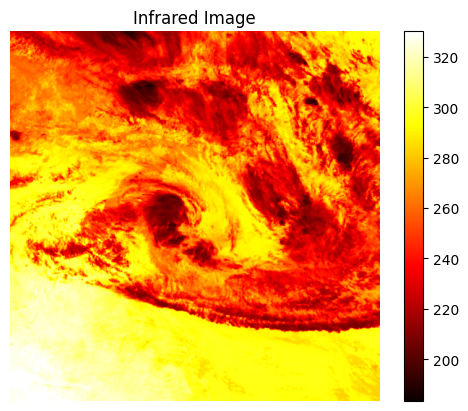

In [ ]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
# /data/image/202405/2024012404-202405-HMW9-1.h5
# Open the H5 file
file_path = '/app/2023120513-202402-HMW9-1.h5'
with h5py.File(file_path, 'r') as h5_file:
    infrared_data = np.array(h5_file['Data'])

# Plot the image
plt.imshow(infrared_data, cmap='hot')  # 'hot' colormap suits infrared data
plt.colorbar()  # Add a colorbar to visualize intensity scale
plt.title("Infrared Image")
plt.axis('off')  # Turn off axis labels
plt.show()


In [4]:
import os

METADATA_DIRS = ['/dataset/0/wnp/metadata/',
                 '/dataset/1/wnp/metadata/', 
                 '/dataset/2/wnp/metadata/']

# Iterate through each directory and count files
for metadata_path in METADATA_DIRS:
    if os.path.exists(metadata_path) and os.path.isdir(metadata_path):
        # Count all files in the directory
        file_count = len([file for file in os.listdir(metadata_path) if os.path.isfile(os.path.join(metadata_path, file))])
        print(f"Directory '{metadata_path}' contains {file_count} files.")
    else:
        print(f"Directory '{metadata_path}' does not exist or is not accessible.")


Directory '/dataset/0/wnp/metadata/' contains 955 files.
Directory '/dataset/1/wnp/metadata/' contains 1116 files.
Directory '/dataset/2/wnp/metadata/' contains 691 files.


In [3]:
import os

METADATA_DIRS = ['/dataset/0/wnp/image/',
                 '/dataset/1/wnp/image/', 
                 '/dataset/2/wnp/image/']

# Iterate through each directory and count folders
for metadata_path in METADATA_DIRS:
    if os.path.exists(metadata_path) and os.path.isdir(metadata_path):
        # Count only subdirectories in the directory
        folder_count = len([item for item in os.listdir(metadata_path) if os.path.isdir(os.path.join(metadata_path, item))])
        print(f"Directory '{metadata_path}' contains {folder_count} folders.")
    else:
        print(f"Directory '{metadata_path}' does not exist or is not accessible.")


Directory '/dataset/0/wnp/image/' contains 955 folders.
Directory '/dataset/1/wnp/image/' contains 1116 folders.
Directory '/dataset/2/wnp/image/' contains 691 folders.


In [1]:
import os
import json

METADATA_DIRS = ['/dataset/0/wnp/image/',
                 '/dataset/1/wnp/image/', 
                 '/dataset/2/wnp/image/']

# Dictionary to store folder names for each directory
folder_names = {}

# Iterate through each directory
for metadata_path in METADATA_DIRS:
    if os.path.exists(metadata_path) and os.path.isdir(metadata_path):
        # Collect only folder names (subdirectories) in the directory
        folders = [item for item in os.listdir(metadata_path) if os.path.isdir(os.path.join(metadata_path, item))]
        dir_name = os.path.basename(os.path.normpath(metadata_path))  # Use directory name as key
        folder_names[dir_name] = folders
        print(f"Directory '{metadata_path}' contains {len(folders)} folders.")
    else:
        print(f"Directory '{metadata_path}' does not exist or is not accessible.")

# Save folder names to a JSON file
output_file = 'folder_names.json'
with open(output_file, 'w') as outfile:
    json.dump(folder_names, outfile, indent=4)

print(f"Folder names written to '{output_file}'.")


Directory '/dataset/0/wnp/image/' contains 955 folders.
Directory '/dataset/1/wnp/image/' contains 1116 folders.
Directory '/dataset/2/wnp/image/' contains 691 folders.
Folder names written to 'folder_names.json'.


In [5]:
import os
import json

METADATA_DIRS = ['/dataset/0/wnp/metadata.json',
                 '/dataset/1/wnp/metadata.json',
                 '/dataset/2/wnp/metadata.json']

# Iterate through each JSON file and count keys
for metadata_file in METADATA_DIRS:
    if os.path.exists(metadata_file) and os.path.isfile(metadata_file):
        try:
            # Open and load JSON file
            with open(metadata_file, 'r') as file:
                data = json.load(file)
            # Count keys in the top-level dictionary
            if isinstance(data, dict):
                key_count = len(data.keys())
                print(f"File '{metadata_file}' contains {key_count} keys.")
            else:
                print(f"File '{metadata_file}' does not contain a top-level dictionary.")
        except json.JSONDecodeError:
            print(f"File '{metadata_file}' is not a valid JSON file.")
    else:
        print(f"File '{metadata_file}' does not exist or is not accessible.")


File '/dataset/0/wnp/metadata.json' contains 955 keys.
File '/dataset/1/wnp/metadata.json' contains 1116 keys.
File '/dataset/2/wnp/metadata.json' contains 691 keys.


In [7]:
import os
import json

METADATA_DIRS = ['/dataset/0/wnp/metadata.json',
                 '/dataset/1/wnp/metadata.json',
                 '/dataset/2/wnp/metadata.json']

# List to store the keys from each JSON file
keys_list = []

# Iterate through each JSON file and collect keys
for metadata_file in METADATA_DIRS:
    if os.path.exists(metadata_file) and os.path.isfile(metadata_file):
        try:
            # Open and load JSON file
            with open(metadata_file, 'r') as file:
                data = json.load(file)
            # Ensure the top-level structure is a dictionary
            if isinstance(data, dict):
                keys_list.append(set(data.keys()))
            else:
                print(f"File '{metadata_file}' does not contain a top-level dictionary.")
        except json.JSONDecodeError:
            print(f"File '{metadata_file}' is not a valid JSON file.")
    else:
        print(f"File '{metadata_file}' does not exist or is not accessible.")

# Find common keys that exist in all JSON files
common_keys = set.intersection(*keys_list) if keys_list else set()

# Write common keys to a JSON file
output_file = 'common_keys.json'
with open(output_file, 'w') as outfile:
    json.dump(list(common_keys), outfile, indent=4)

print(f"Common keys written to '{output_file}'.")


Common keys written to 'common_keys.json'.


In [8]:
import os
import json

METADATA_DIRS = ['/dataset/0/wnp/metadata/',
                 '/dataset/1/wnp/metadata/', 
                 '/dataset/2/wnp/metadata/']

# List to store sets of filenames (without extensions) for each directory
file_sets = []

# Iterate through each directory and collect file names
for metadata_path in METADATA_DIRS:
    if os.path.exists(metadata_path) and os.path.isdir(metadata_path):
        # Collect only file names (without extensions) in the directory
        files = {os.path.splitext(file)[0] for file in os.listdir(metadata_path) if os.path.isfile(os.path.join(metadata_path, file))}
        file_sets.append(files)
    else:
        print(f"Directory '{metadata_path}' does not exist or is not accessible.")

# Find the intersection of all sets (files common to all directories)
common_files = set.intersection(*file_sets) if file_sets else set()

# Save common file names (without extensions) to a JSON file
output_file = 'common_files.json'
with open(output_file, 'w') as outfile:
    json.dump(list(common_files), outfile, indent=4)

print(f"Common file names (without extensions) written to '{output_file}'.")


Common file names (without extensions) written to 'common_files.json'.


In [12]:
# File paths
file_paths = ['common_files.json', 'common_keys.json', 'folder_names.json']

# Load data from each file
data = {}
for file_path in file_paths:
    try:
        with open(file_path, 'r') as f:
            data[file_path] = set(json.load(f))  # Load data as a set for easy comparison
    except Exception as e:
        print(f"Error reading {file_path}: {e}")
        data[file_path] = set()

# Compare values between the files
common_values = set.intersection(*data.values()) if all(data.values()) else set()

# Count common values
common_count = len(common_values)
common_count

691

In [9]:
import json
import os

# Example paths and loading folder structure
METADATA_DIRS = ['/dataset/0/wnp/image/',
                 '/dataset/1/wnp/image/', 
                 '/dataset/2/wnp/image/']
PATH_COMMON_FOLDERS = 'folder_names.json'

# Read the data from PATH_COMMON_FOLDERS
with open(PATH_COMMON_FOLDERS, 'r') as f:
    common_folders = json.load(f)

# Get the example folder
example_folder = common_folders['image'][0]

# Generate paths to check
all_path_need_checking = [os.path.join(i, example_folder) for i in METADATA_DIRS]
print("all_path_need_checking", all_path_need_checking)

# Function to get common files
def get_common_files(paths):
    common_files = None  # Initialize with None to handle the first directory
    
    for path in paths:
        if not os.path.exists(path):
            print(f"Path {path} does not exist.")
            return None
        
        # Get files in the current path
        current_files = set(os.listdir(path))
        
        # Compute intersection of files
        if common_files is None:
            common_files = current_files
        else:
            common_files = common_files.intersection(current_files)
    
    return common_files

# Get the common files
common_files = get_common_files(all_path_need_checking)

# Output the common files
if common_files is not None:
    print(f"Common files across all paths: {sorted(common_files)}")
else:
    print("Could not determine common files due to missing paths or errors.")


Common files across all paths: []


In [3]:
import h5py
import matplotlib.pyplot as plt
import numpy as np

# Open the H5 file
file_path = '/dataset/0/wnp/image/197830/1978120100-197830-GMS1-0.h5'
with h5py.File(file_path, 'r') as h5_file:
    # Get list keys of h5_file
    keys = list(h5_file.keys())
    print(f"Keys in the H5 file: {keys}")


Keys in the H5 file: ['Infrared']


In [2]:
import h5py
import matplotlib.pyplot as plt
import numpy as np

# Open the H5 file
file_path = '/app/pyphoon2/tests/test_data_files/image/200801/2008041304-200801-MTS1-1.h5'
with h5py.File(file_path, 'r') as h5_file:
    # Get list keys of h5_file
    path_expect_to_save = '/app/pyphoon2/tests/test_data_files/image/200801/2008041304-200801-MTS1-1_modified.h5'
    # Save the modified H5 file
    # Change the key 'Infrared' to 'Infrared_modified'
    with h5py.File(path_expect_to_save, 'w') as h5_file_modified:
        for key in h5_file.keys():
            if key == 'Infrared':
                h5_file_modified.create_dataset('Infrared_modified', data=h5_file[key])
            else:
                h5_file_modified.create_dataset(key, data=h5_file[key])


In [3]:
import h5py
import matplotlib.pyplot as plt
import numpy as np

# Open the H5 file
file_path = '/app/pyphoon2/tests/test_data_files/image/200801/2008041304-200801-MTS1-1_modified.h5'
with h5py.File(file_path, 'r') as h5_file:
    list_keys = list(h5_file.keys())
    print(f"Keys in the H5 file: {list_keys}")


Keys in the H5 file: ['Infrared_modified']
